In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gym Members

Os dados desse dataset são informações gerais sobre sessões de exercícios de membros de academias, em diferentes exercícios, assim como informações pessoais. Inclui informações como média de batimentos por minuto, BPMs máximo, altura, peso, gênero, nível de experiência e e, com foco maior, quantidade de calorias gasta naquela sessão.

Como objetivo para o modelo desenvolvido, busca-se usar as informações sobre outras sessões a fim de **prever qual a quantidade de calorias** ele gastou, usando para isso os dados gerados com os exercícios praticados.

In [2]:
df = pd.read_csv("../data/gym_members_exercise_tracking.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


# Análise dos dados

In [3]:
print(f"Linhas: {df.shape[0]} | Colunas: {df.shape[1]}")

Linhas: 973 | Colunas: 15


In [4]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [6]:
print(f"Dataset possui NaN? {df.isnull().values.any()}")

Dataset possui NaN? False


In [7]:
print(f"Dados duplicados no dataset? {df.duplicated().values.any()}")

Dados duplicados no dataset? False


# Visualizações

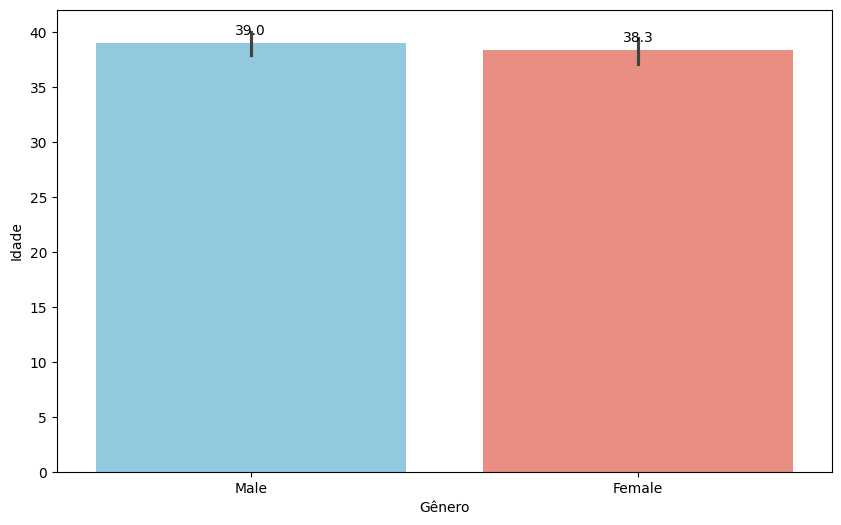

In [8]:
# verificando a idade média entre homens e mulheres no conjunto de dados
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Gender",
    y="Age",
    hue="Gender",
    data=df,
    palette={"Female": "salmon", "Male": "skyblue"},
    legend=False,
)

# adiciona valor da idade média a cima da barra
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".1f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )

plt.xlabel("Gênero")
plt.ylabel("Idade")
plt.show()

In [9]:
# Get the columns with object data type
object_columns = df.select_dtypes(include=['object']).columns
print("Colunas com valores não numéricos:", object_columns.tolist())
for col in object_columns:
    print(f"Valores únicos na coluna '{col}': {df[col].unique()}")

Colunas com valores não numéricos: ['Gender', 'Workout_Type']
Valores únicos na coluna 'Gender': ['Male' 'Female']
Valores únicos na coluna 'Workout_Type': ['Yoga' 'HIIT' 'Cardio' 'Strength']


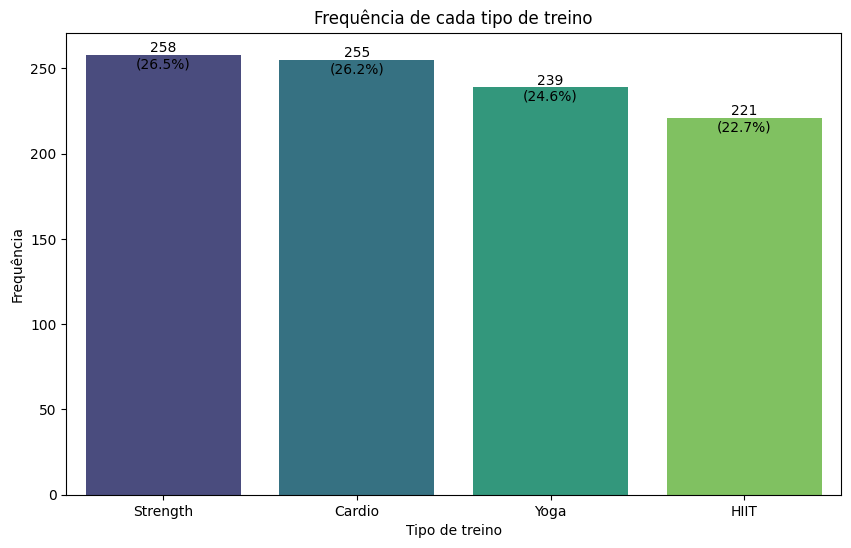

In [10]:
# contando a frequência de cada tipo de treino
workout_counts = df["Workout_Type"].value_counts()
workout_percentages = (workout_counts / workout_counts.sum()) * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=workout_counts.index,
    y=workout_counts.values,
    hue=workout_counts.index,
    palette="viridis",
    dodge=False,
    legend=False,
)

# labels e título
plt.xlabel("Tipo de treino")
plt.ylabel("Frequência")
plt.title("Frequência de cada tipo de treino")

# contagem e % de cada tipo de treino em cima das barras
for p, percentage in zip(ax.patches, workout_percentages):
    ax.annotate(
        f"{int(p.get_height())}\n({percentage:.1f}%)",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        xytext=(0, -12),
        textcoords="offset points",
    )

plt.show()

# Transformações no dataset

Como algumas das colunas do dataset são valores não numéricos (gênero e tipo de exercício), é necessário transformar essas colunas, uma vez que serão importantes indicadores para a previsão do modelo.

- *Gênero*: mapeamento dos valores `Male` para 0 e `Female` para 1.
- *Workout_Type*: One-hot encoding, criando 4 novas colunas, uma para cada tipo de exercício e, para cada linha, indicando com 1 o tipo realizado (com os demais marcados com 0).

In [ ]:
# criando um novo DataFrame para não modificar o original
df_encoded = df.copy()

# mapeando os valores em formato string para valores numéricos
df_encoded["Gender"] = df_encoded["Gender"].map({"Male": 0, "Female": 1})

# one hot encoding da coluna "Workout_Type"
df_encoded = pd.get_dummies(df_encoded, columns=["Workout_Type"], prefix="Workout_Type").astype(int)
df_encoded.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,0,88,1,180,157,60,1,1313,12,3,4,3,30,0,0,0,1
1,46,1,74,1,179,151,66,1,883,33,2,4,2,32,0,1,0,0
2,32,1,68,1,167,122,54,1,677,33,2,4,2,24,1,0,0,0
3,25,0,53,1,190,164,56,0,532,28,2,3,1,18,0,0,1,0
4,38,0,46,1,188,158,68,0,556,29,2,3,1,14,0,0,1,0


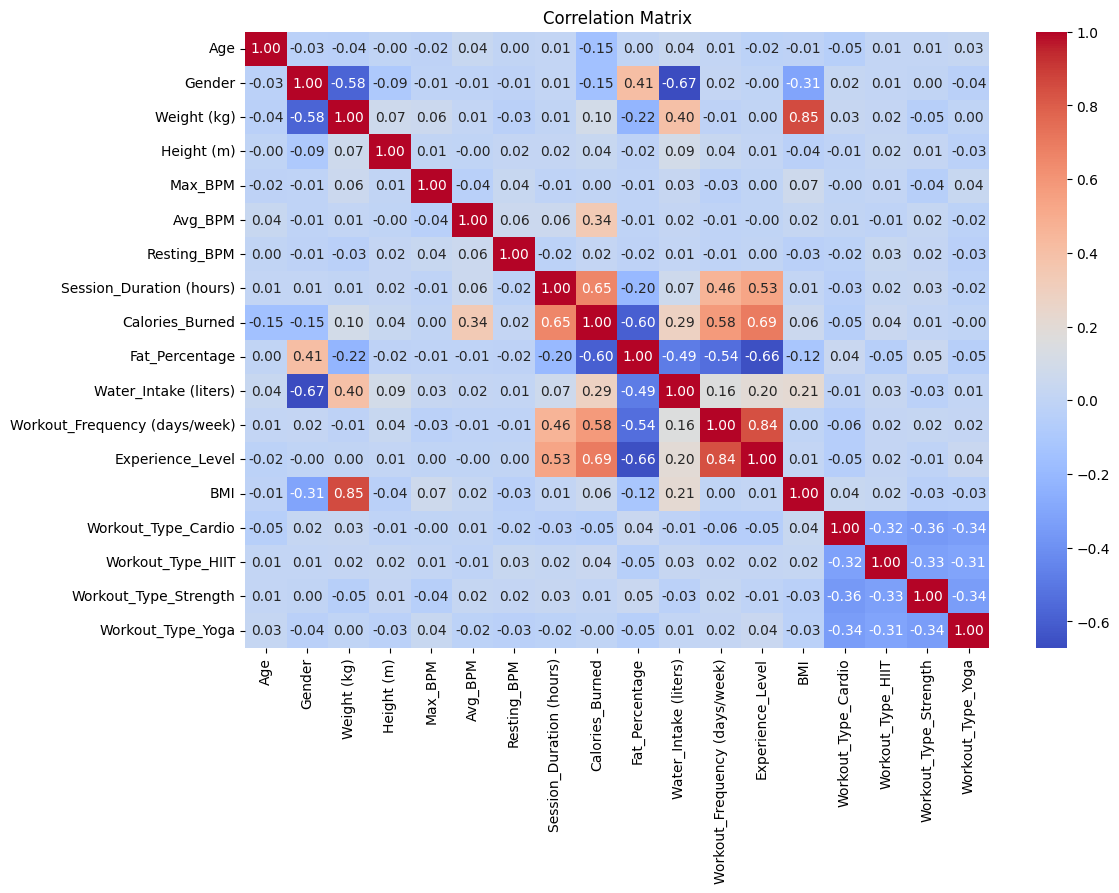

In [12]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Tratamento de outliers

O conjunto de dados possui viéses devido à *outliers* nas colunas de quantidade de calorias queimadas, impactando drasticamente as previsões, bem como no *BMI* (IMC). Para tratar esses valores, usou-se o método IQR (interquartile range), alterando valores que são 1.5 vezes maior ou menor que o IQR (Q3 - Q1) dos dados para o maior ou menor valor possível para aquela coluna, respeitando o limite para não ser mais um outlier.

In [ ]:
# tratando outliers usando quartis

Q1 = df_encoded["Calories_Burned"].quantile(0.25)
Q3 = df_encoded["Calories_Burned"].quantile(0.75)

IQR_cal = Q3 - Q1

min_val_cal = Q1 - 1.5 * IQR_cal
max_val_cal = Q3 + 1.5 * IQR_cal


df_encoded["Calories_Burned"] = np.where(
    df_encoded["Calories_Burned"] < min_val_cal, min_val_cal, df_encoded["Calories_Burned"]
)

df_encoded["Calories_Burned"] = np.where(
    df_encoded["Calories_Burned"] > max_val_cal, max_val_cal, df_encoded["Calories_Burned"]
)

####

Q1_bmi = df['BMI'].quantile(0.25)
Q3_bmi = df['BMI'].quantile(0.75)

IQR_bmi = Q3_bmi - Q1_bmi

min_val_bmi = Q1_bmi - 1.5 * IQR_bmi
max_val_bmi = Q3_bmi + 1.5 * IQR_bmi


df_encoded["BMI"] = np.where(df_encoded["BMI"] < min_val_bmi, min_val_bmi, df_encoded["BMI"])
df_encoded["BMI"] = np.where(df_encoded["BMI"] > max_val_bmi, max_val_bmi, df_encoded["BMI"])

# Criando o modelo
Com esse modelo, busca-se prever a quantidade de calorias queimadas por um praticante de exercício (`Calories_Burned`) baseado nos dados do dataset.

Os dados apresentam, em partes, boa correlação linear, como uma **correlação negativa** entre *consumo de água* e *idade* (quando mais novo = menor o consumo de água), **correlação positiva** entre *nível de experiência* e *quantidade de calorias queimadas* (mais experiência = mais queima de caloria) e **correlação positiva** entre *peso* e *BMI (índice de massa corporal, IMC)* (devido a forma que é calculado esse valor, considerando o peso e altura de cada indivíduo, gerando maior IMC conforme possui maior massa).

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

correlation = df_encoded.corr()["Calories_Burned"].sort_values(ascending=False)
correlation = correlation.abs()

# filtrando pelas colunas com maior correlação
filtered_columns = correlation[correlation >= 0.03].index
print("Filtered columns:", sorted(filtered_columns))

X = df_encoded[filtered_columns].drop(columns=["Calories_Burned"])
y = df_encoded["Calories_Burned"]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

y_min = y.min()
y_max = y.max()
y_scaled = 2 * (y - y_min) / (y_max - y_min) - 1  # Scale to [-1, 1]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

Filtered columns: ['Age', 'Avg_BPM', 'BMI', 'Calories_Burned', 'Experience_Level', 'Fat_Percentage', 'Gender', 'Height (m)', 'Session_Duration (hours)', 'Water_Intake (liters)', 'Weight (kg)', 'Workout_Frequency (days/week)', 'Workout_Type_Cardio', 'Workout_Type_HIIT']


In [ ]:
from models import MLP
from nn import relu
from metrics import rmse, mse

model = MLP(len(X_train), [8, 8, 1], activation_fn=relu, regression=True)

EPOCHS = 50
LR = 0.02

In [ ]:
import time

# Training loop
start_time = time.time()
entire_train_time = time.time()

for epoch in range(EPOCHS):
    y_pred_train = [model(x) for x in X_train.values]

    loss = rmse(y_pred_train, y_train.values)

    for p in model.parameters():
        p.grad = 0

    loss.backward()

    for p in model.parameters():
        p.data -= LR * p.grad
    
    if epoch % 5 == 0:
        elapsed_time = time.time() - start_time
        print(f"Epoch {epoch + 1} Loss: {loss.data} Time elapsed: {elapsed_time:.2f} seconds")
        start_time = time.time()
        
print(f"Training time: {time.time() - entire_train_time:.2f} seconds")

Epoch 1 Loss: 5.35332796004704 Time elapsed: 5.27 seconds
Epoch 2 Loss: 3.656549244958536 | Time: 12.28 secs
Epoch 3 Loss: 2.419242848972454 | Time: 6.17 secs
Epoch 4 Loss: 1.5462903092737634 | Time: 5.36 secs
Epoch 5 Loss: 1.0645448234839425 | Time: 6.37 secs
Epoch 6 Loss: 0.8934868115288037 Time elapsed: 30.26 seconds
Epoch 7 Loss: 0.8131327230107408 | Time: 10.60 secs
Epoch 8 Loss: 0.7448060113541393 | Time: 5.26 secs
Epoch 9 Loss: 0.6880441075524298 | Time: 5.17 secs
Epoch 10 Loss: 0.646144310581646 | Time: 4.96 secs
Epoch 11 Loss: 0.6132596037287112 Time elapsed: 26.91 seconds
Epoch 12 Loss: 0.5884200534666162 | Time: 11.55 secs
Epoch 13 Loss: 0.5669146747123937 | Time: 5.16 secs
Epoch 14 Loss: 0.5496403666568961 | Time: 5.12 secs
Epoch 15 Loss: 0.5355542786879781 | Time: 5.04 secs
Epoch 16 Loss: 0.5230387078802275 Time elapsed: 27.06 seconds
Epoch 17 Loss: 0.5121448537162714 | Time: 11.91 secs
Epoch 18 Loss: 0.5022081854556064 | Time: 5.47 secs
Epoch 19 Loss: 0.4932302167193187 |

In [43]:
y_pred_test_scaled = [model(x) for x in X_test.values]

# Inverse Min-Max scaling for predictions
y_pred_test = [(y_pred + 1) / 2 * (y_max - y_min) + y_min for y_pred in y_pred_test_scaled]
y_test_original = [(y + 1) / 2 * (y_max - y_min) + y_min for y in y_test]  # Reverse scaling for test set

# Calculate MSE and RMSE on the original scale
mse_test = mse(y_pred_test, y_test_original)
rmse_test = rmse(y_pred_test, y_test_original)

print(f"Test MSE: {mse_test.data}")
print(f"Test RMSE: {rmse_test.data}")

Test MSE: 56827.47940581152
Test RMSE: 238.38514929796176


In [44]:
y_mean = y.mean()
y_range = y.max() - y.min()

rmse_fraction_range = rmse_test.data / y_range
rmse_fraction_mean = rmse_test.data / y_mean
print(f"RMSE as % of range: {rmse_fraction_range * 100:.2f}%")
print(f"RMSE as % of mean: {rmse_fraction_mean * 100:.2f}%")

RMSE as % of range: 18.24%
RMSE as % of mean: 26.35%


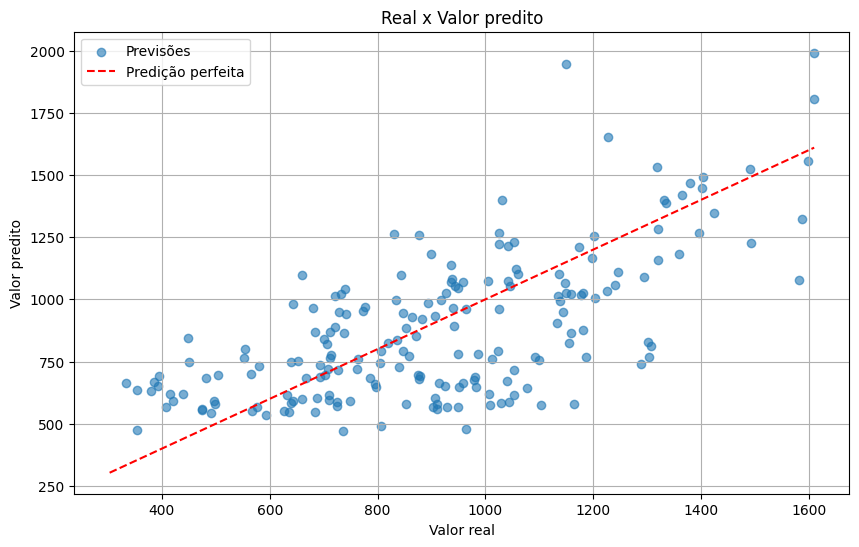

In [ ]:
y_pred_test_float = list(map(lambda x: x.data, y_pred_test))

plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_test_float, alpha=0.6, label="Previsões")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Predição perfeita")
plt.xlabel("Valor real")
plt.ylabel("Valor predito")
plt.title("Real x Valor predito")
plt.legend()
plt.grid()
plt.show()

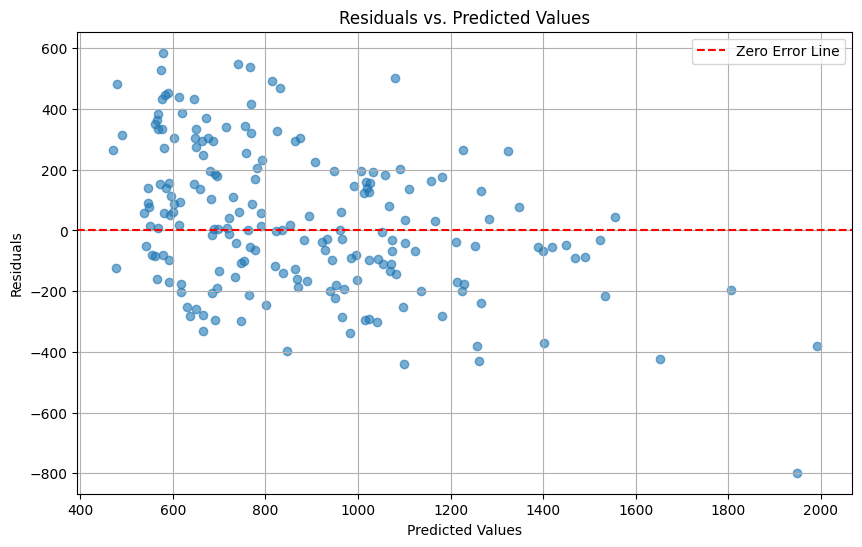

In [ ]:
residuals = np.array(y_test_original) - np.array(y_pred_test_float)

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test_float, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', label="Zero Error Line")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.legend()
plt.grid()
plt.show()

In [ ]:
model2 = MLP(len(X_train), [16, 8, 1], activation_fn=relu, regression=True)

EPOCHS = 35
LR = 0.02

In [ ]:
start_time = time.time()
entire_train_time = time.time()

for epoch in range(EPOCHS):
    y_pred_train = [model2(x) for x in X_train.values]

    loss = rmse(y_pred_train, y_train.values)

    for p in model2.parameters():
        p.grad = 0

    loss.backward()

    for p in model2.parameters():
        p.data -= LR * p.grad
    
    if epoch % 5 == 0:
        elapsed_time = time.time() - start_time
        print(f"Epoch {epoch + 1} Loss: {loss.data} Time elapsed: {elapsed_time:.2f} seconds")
        start_time = time.time()
        
print(f"Training time: {time.time() - entire_train_time:.2f} seconds")

Epoch 1 Loss: 6.439714976039859 Time elapsed: 7.54 seconds
Epoch 2 Loss: 4.422794328769798 | Time: 15.25 secs
Epoch 3 Loss: 3.08871234892929 | Time: 12.05 secs
Epoch 4 Loss: 2.2112510251917405 | Time: 13.20 secs
Epoch 5 Loss: 1.6654226303706967 | Time: 10.86 secs
Epoch 6 Loss: 1.3472005454261735 Time elapsed: 57.44 seconds
Epoch 7 Loss: 1.1596569268052657 | Time: 24.78 secs
Epoch 8 Loss: 1.0318066965896286 | Time: 10.59 secs
Epoch 9 Loss: 0.9297479981196151 | Time: 12.39 secs
Epoch 10 Loss: 0.8462205762610154 | Time: 12.81 secs
Epoch 11 Loss: 0.7762981008185804 Time elapsed: 60.67 seconds
Epoch 12 Loss: 0.7178721774612247 | Time: 28.39 secs
Epoch 13 Loss: 0.6680739554540774 | Time: 15.96 secs
Epoch 14 Loss: 0.6251769495113227 | Time: 12.85 secs
Epoch 15 Loss: 0.5892447275072252 | Time: 10.94 secs
Epoch 16 Loss: 0.5580880257137149 Time elapsed: 67.59 seconds
Epoch 17 Loss: 0.5311806765982316 | Time: 23.76 secs
Epoch 18 Loss: 0.5079729049462745 | Time: 12.61 secs
Epoch 19 Loss: 0.4885472

In [19]:
y_pred_test_scaled = [model2(x) for x in X_test.values]

# Inverse Min-Max scaling for predictions
y_pred_test = [(y_pred + 1) / 2 * (y_max - y_min) + y_min for y_pred in y_pred_test_scaled]
y_test_original = [(y + 1) / 2 * (y_max - y_min) + y_min for y in y_test]  # Reverse scaling for test set

# Calculate MSE and RMSE on the original scale
mse_test = mse(y_pred_test, y_test_original)
rmse_test = rmse(y_pred_test, y_test_original)

print(f"Test MSE: {mse_test.data}")
print(f"Test RMSE: {rmse_test.data}")

y_mean = y.mean()
y_range = y.max() - y.min()

rmse_fraction_range = rmse_test.data / y_range
rmse_fraction_mean = rmse_test.data / y_mean
print(f"RMSE as % of range: {rmse_fraction_range * 100:.2f}%")
print(f"RMSE as % of mean: {rmse_fraction_mean * 100:.2f}%")

Test MSE: 69498.20988058356
Test RMSE: 263.6251313524254
RMSE as % of range: 20.17%
RMSE as % of mean: 29.14%


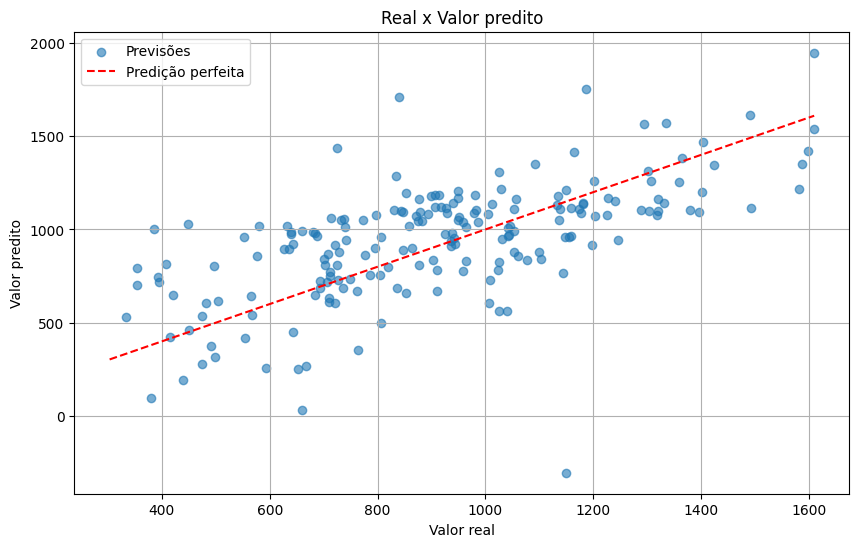

In [ ]:
y_pred_test_float = list(map(lambda x: x.data, y_pred_test))

plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_test_float, alpha=0.6, label="Previsões")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Predição perfeita")
plt.xlabel("Valor real")
plt.ylabel("Valor predito")
plt.title("Real x Valor predito")
plt.legend()
plt.grid()
plt.show()

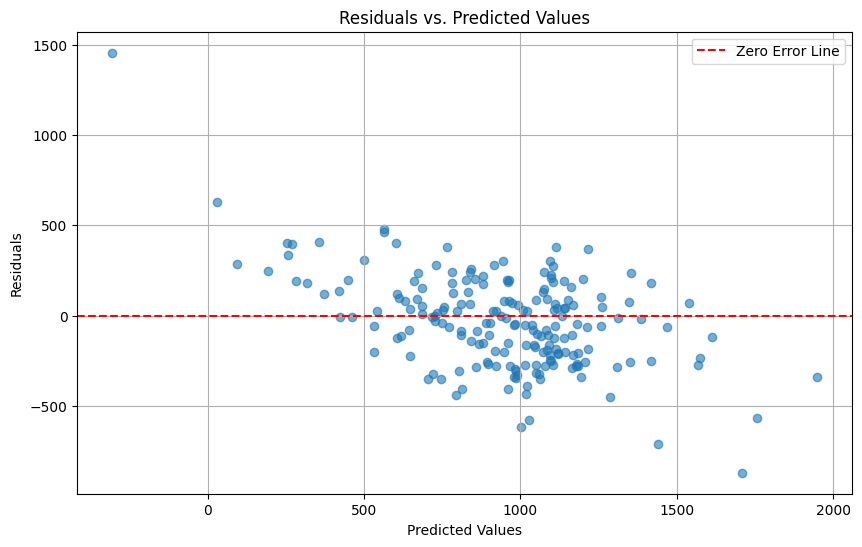

In [21]:
residuals = np.array(y_test_original) - np.array(y_pred_test_float)

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test_float, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', label="Zero Error Line")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.legend()
plt.grid()
plt.show()